In [1]:
from nnfs.datasets import spiral_data
import numpy as np
import nnfs
nnfs.init()

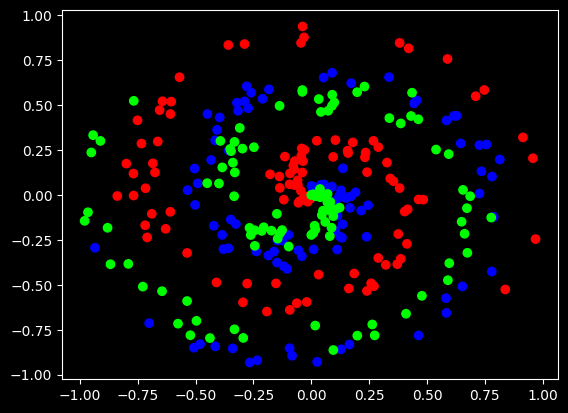

In [2]:
import matplotlib.pyplot as plt
plt.style.use('dark_background')
x, y = spiral_data(samples=100, classes=3)
plt.scatter(x[:,0], x[:, 1], c=y, cmap='brg')
plt.show()


In [3]:
class DenseLayer:
    # Layer initilization
    def __init__(self, n_inputs, n_neurons):
        self.weights=0.01*np.random.randn(n_inputs, n_neurons)
        self.biases=np.zeros((1, n_neurons))

    # forward pass
    def forward(self, inputs):
        # calculate the output values from inputs, weights and outputs
        self.output = np.dot(inputs, self.weights) + self.biases
    

In [4]:
# create dataset
x, y = spiral_data(samples=100, classes=3)

# dense layer with 2 input features and 3 output values
dense1 = DenseLayer(2,3)

# perform forward pass
dense1.forward(x)

# output of the each neuron (3 neuron 3 outputs)
print(dense1.output[:5])

[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-1.11171044e-04 -5.11007493e-05 -1.12099799e-04]
 [ 2.99257295e-06 -2.69126613e-04 -1.45165104e-04]
 [ 8.95101766e-05 -4.30442247e-04 -1.68079801e-04]
 [-3.49893759e-04 -3.07208364e-04 -4.33002861e-04]]


<div class="alert alert-block alert-success"><b>ACTIVATION FUNCTION: RELU<b><div>

In [5]:
import numpy as np

inputs = [0, 2, -1, 3.3, -2.7, 1.1, 2.2, -100]
output = np.maximum(0, inputs)
print(output)

[0.  2.  0.  3.3 0.  1.1 2.2 0. ]


In [6]:
# Relu activation
class ReLU_Activation:
    def forward(self, inputs):
        self.output = np.maximum(0, inputs)

<div class="alert alert-block alert-success"><b>ACTIVATION FUNCTION: SOFTMAX<b><div>

In [7]:
inputs = [[1,2,3,2.5],
          [2.,5.,-1.,2],
          [-1.5,2.7,3.3,-0.8]]

# get unnormalized probabilities
exp_values=np.exp(inputs-np.max(inputs, axis=1, keepdims=True))
# normalize them each for sample
probabilites=exp_values/np.sum(exp_values, axis=1, keepdims=True)
print(probabilites)
np.sum(probabilites, axis=1)

[[0.06414769 0.17437149 0.47399085 0.28748998]
 [0.04517666 0.90739747 0.00224921 0.04517666]
 [0.00522984 0.34875873 0.63547983 0.0105316 ]]


array([1., 1., 1.])

In [8]:
# softmax activation

class Softmax_Activation:
    # forward pass
    def forward(self, inputs):
        # get unnormalized probabilities
        exp_values=np.exp(inputs-np.max(inputs, axis=1, keepdims=True))
        # normalize them each for sample
        probabilites=exp_values/np.sum(exp_values, axis=1, keepdims=True)
        self.output=probabilites

In [9]:
# create dataset
x, y = spiral_data(samples=100, classes=3)

# dense layer with 2 input features and 3 output values
dense1 = DenseLayer(2,3)

# create activation ReLU (to be used with dense layer)
activation1 = ReLU_Activation()

# create second dense layer with 3 input features (as
# we take output of privious layer here) and 3 output values
dense2 = DenseLayer(3,3)

# create softmax activation 
activation2 = Softmax_Activation()

# make the forward pass of our training data
dense1.forward(x)

# apply relu activation function to dense layer 1 neurons
activation1.forward(dense1.output)

# make the forward pass through second dense layer 
# it take the output of activation fuction of first layer as input
dense2.forward(activation1.output)

# make the forward pass through activation function
# it take the input as output of second dense layer
activation2.forward(dense2.output)

# Let's see the output of first few samples:
print(activation2.output[:5])

[[0.33333334 0.33333334 0.33333334]
 [0.33333418 0.33333272 0.33333308]
 [0.3333347  0.33333236 0.33333296]
 [0.33333558 0.33333167 0.33333272]
 [0.3333367  0.3333308  0.3333324 ]]


<div class="alert alert-block alert-success"><b>CALCULATING NETWORK ERROR WITH LOSS<b><div>

<div class="alert alert-block alert-warning"><i>CROSS ENTROY LOSS<i><div>

In [10]:
import numpy as np

In [11]:
softmax_outputs = np.array([[0.7, 0.1, 0.2],
[0.1,0.5,0.4],
[0.02, 0.9, 0.08]])

class_targets = [0, 1, 1]
# print(softmax_outputs[[0,1,2], class_targets])
print(softmax_outputs[range(len(softmax_outputs)), class_targets])

[0.7 0.5 0.9]


In [12]:
print(-np.log(softmax_outputs[
    range(len(softmax_outputs)), class_targets
]))

neg_log = -np.log(softmax_outputs[
    range(len(softmax_outputs)), class_targets
])

average_loss = np.mean(neg_log)
print(average_loss)

[0.35667494 0.69314718 0.10536052]
0.38506088005216804


In [13]:
op = np.array([[0.7, 0.1, 0.2],
[0.1,0.5,0.4],
[0.02, 0.9, 0.08]])

true = [0, 1, 1]

In [14]:
np.argmax(op[0])

np.int64(0)

<div class="alert alert-block alert-warning">IF DATA IS ONE HOT ENCODED, HOW TO EXTRACT RELAVENT PREDICTIONS<div>

In [15]:
y_true_check = np.array([
    [1,0,0],
    [1,1,0],
    [0,1,0]
])

y_pred_clipped_check = np.array([
[0.7, 0.1, 0.2],
[0.1,0.5,0.4],
[0.02, 0.9, 0.08]])


y_true_check*y_pred_clipped_check

array([[0.7, 0. , 0. ],
       [0.1, 0.5, 0. ],
       [0. , 0.9, 0. ]])

In [16]:
A = y_true_check*y_pred_clipped_check
B = np.sum(A, axis=1)
C = -np.log(B)

print(C)
print(np.mean(C))

[0.35667494 0.51082562 0.10536052]
0.3242870277875165


In [17]:
# commaon loss class 
class Loss:
    # Calculates data and regularization loss 
    # gvien model output and ground truth values
    def calculate(self, output, y):
        # Calculate sample losses
        sample_losses = self.forward(output, y)
        # Calculate mean loss
        data_loss=np.mean(sample_losses)

        return data_loss

<div class="alert alert-block alert-warning">IMPLEMENTING THE CATEGORICAL CROSS ENTROPY CLASS<div>

In [18]:
class Loss_CategoricalCrossEntropy(Loss):
    
    def forward(self, y_pred, y_true):
        # No of samples in a  batch
        samples = len(y_pred)
        # Clip the data to prevent divison by zero
        # Clip both sides to not drag mean towards any value
        y_pred_clipped = np.clip(y_pred, 1e-7, 1-1e-7)
        # Probabilites for target values
        # only if categorcial label
        if len(y_true.shape) == 1:
            correct_confidences = y_pred_clipped[range(samples), y_true]
        # Mask values only for one-hot encoded labels
        elif len(y_true.shape) == 2:
            correct_confidences = np.sum(y_pred_clipped*y_true, axis=1)

        # losses
        negative_log_likelihoods = - np.log(correct_confidences)
        return negative_log_likelihoods

In [19]:
class_targets = np.array([
    [1,0,0],
    [1,1,0],
    [0,1,0]
])

softmax_outputs = np.array([
[0.7, 0.1, 0.2],
[0.1,0.5,0.4],
[0.02, 0.9, 0.08]])

In [20]:
loss_function = Loss_CategoricalCrossEntropy()
loss = loss_function.calculate(softmax_outputs, class_targets)
print(loss)

0.3242870277875165


In [21]:
# create dataset
x, y = spiral_data(samples=100, classes=3)

# dense layer with 2 input features and 3 output values
dense1 = DenseLayer(2,3)

# create activation ReLU (to be used with dense layer)
activation1 = ReLU_Activation()

# create second dense layer with 3 input features (as
# we take output of privious layer here) and 3 output values
dense2 = DenseLayer(3,3)

# create softmax activation 
activation2 = Softmax_Activation()

# create loss function 
loss_function = Loss_CategoricalCrossEntropy()

# make the forward pass of our training data
dense1.forward(x)

# apply relu activation function to dense layer 1 neurons
activation1.forward(dense1.output)

# make the forward pass through second dense layer 
# it take the output of activation fuction of first layer as input
dense2.forward(activation1.output)

# make the forward pass through activation function
# it take the input as output of second dense layer
activation2.forward(dense2.output)

# Let's see the output of first few samples:
print(activation2.output[:5])

# perfrom a forward pass and through activation function
# it takes the output of second dense layer here and return loss
loss=loss_function.calculate(activation2.output, y)
print("Loss ", loss)

# calculate the accuracy from output of activation2 and targets
# calculate values along first axis
predictions=np.argmax(activation2.output, axis=1)
if len(y.shape) == 2:
    y = np.argmax(y, axis=1)

accuracy = np.mean(predictions == y)
# print accuracy 
print(accuracy)

[[0.33333334 0.33333334 0.33333334]
 [0.33333382 0.3333335  0.3333327 ]
 [0.3333343  0.3333334  0.33333227]
 [0.3333348  0.33333346 0.33333176]
 [0.33333525 0.3333339  0.3333309 ]]
Loss  1.0986109
0.33


<div class="alert alert-block alert-success">INTRODUCING ACCURACY<div>

In [22]:
import numpy as np
# probabilites of 3 class


softmax_outputs = np.array([
[0.7, 0.1, 0.2],
[0.1,0.5,0.4],
[0.02, 0.9, 0.08]])

class_targets = np.array([0,1,1])
# calculate value along second axis
predictions = np.argmax(softmax_outputs, axis=1)
# if targets are one hot encoded- convert them
if len(class_targets.shape) == 2:
    class_targets=np.argmax(class_targets, axis=1)
# True evalue to 1: false to 0
accuracy=np.mean(predictions == class_targets)
print("acc ", accuracy)


acc  1.0


<div class="alert alert-block alert-success">NEED FOR OPTIMIZATION<div>

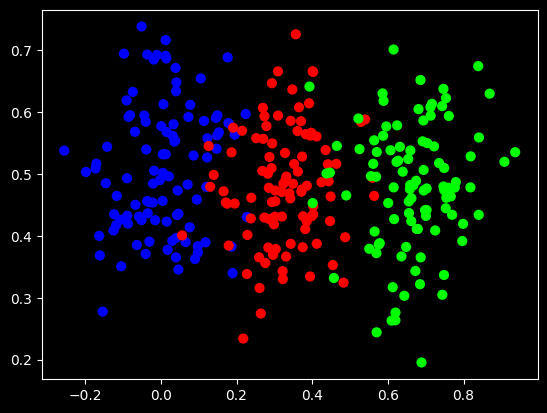

In [23]:
import matplotlib.pyplot as plt
import nnfs 
from nnfs.datasets import vertical_data
nnfs.init()
x,y=vertical_data(samples=100, classes=3)
plt.scatter(x[:,0], x[:,1], c=y, s=40, cmap='brg')
plt.show()

<div class="alert alert-block alert-danger">STRATEGY 1: RANDOMLY SELECT WEIGHT AND BIASES-DOES NOT WORK<div>

In [26]:
# Dataset
x,y = vertical_data(samples=100, classes=3)
# create model 
dense1 = DenseLayer(2,3)
activation1=ReLU_Activation()
dense2=DenseLayer(3,3)
activation2=Softmax_Activation()
# create loss function
loss_function=Loss_CategoricalCrossEntropy()

# Helper variables
lowest_losses = 9999999 # some initial value
best_dense1_weights = dense1.weights.copy()
best_dense1_biases = dense1.biases.copy()
best_dense2_weights = dense2.weights.copy()
best_dense2_biases = dense2.weights.copy()

for iteration in range(100000):
    # generate new set of weigths for iterations 
    dense1.weights = 0.05*np.random.randn(2,3)
    dense1.biases = 0.05*np.random.randn(1,3)
    dense2.weights = 0.05*np.random.randn(3,3)
    dense1.biases = 0.05*np.random.randn(1,3)

    # perform the forward pass of the training data through this layer 
    dense1.forward(x)
    activation1.forward(dense1.output)
    dense2.forward(activation1.output)
    activation2.forward(dense2.output)
    # perform the forward pass through the activation function
    # it take the output of the second dense layer here and return loss
    loss = loss_function.calculate(activation2.output, y)
    # calculate the accuracy from the activation2 and targets
    # calculate value along first axis 
    predictions = np.argmax(activation2.output, axis=1)
    accuracy=np.mean(predictions==y)
    # If loss is smaller - print and save weights and biases aside 
    if loss < lowest_losses:
        print("New set of weights found, iteration:", iteration, "loss:", loss, "accuracy:",accuracy)
        best_dense1_weights = dense1.weights.copy()
        best_dense1_biases = dense1.biases.copy()
        best_dense2_weights = dense2.weights.copy()
        best_dense2_biases = dense2.biases.copy()
        lowest_losses =loss

New set of weights found, iteration: 0 loss: 1.0985271 accuracy: 0.3333333333333333
New set of weights found, iteration: 1 loss: 1.0984986 accuracy: 0.3333333333333333
New set of weights found, iteration: 3 loss: 1.0984045 accuracy: 0.35333333333333333
New set of weights found, iteration: 4 loss: 1.0982902 accuracy: 0.3333333333333333
New set of weights found, iteration: 7 loss: 1.0977348 accuracy: 0.3333333333333333
New set of weights found, iteration: 28 loss: 1.0976318 accuracy: 0.3333333333333333
New set of weights found, iteration: 117 loss: 1.0976212 accuracy: 0.3333333333333333
New set of weights found, iteration: 142 loss: 1.0970465 accuracy: 0.3333333333333333
New set of weights found, iteration: 189 loss: 1.096731 accuracy: 0.39666666666666667
New set of weights found, iteration: 1051 loss: 1.0964414 accuracy: 0.33666666666666667
New set of weights found, iteration: 4447 loss: 1.0961208 accuracy: 0.6466666666666666
New set of weights found, iteration: 8876 loss: 1.0960066 acc

<div class="alert alert-block alert-danger">STRATEGY 2: RANDOMLY ADJUST WEIGHTS AND BIASES- WORKS!<div>

In [29]:
# Dataset
x,y = vertical_data(samples=100, classes=3)
# create model 
dense1 = DenseLayer(2,3)
activation1=ReLU_Activation()
dense2=DenseLayer(3,3)
activation2=Softmax_Activation()
# create loss function
loss_function=Loss_CategoricalCrossEntropy()

# Helper variables
lowest_losses = 9999999 # some initial value
best_dense1_weights = dense1.weights.copy()
best_dense1_biases = dense1.biases.copy()
best_dense2_weights = dense2.weights.copy()
best_dense2_biases = dense2.weights.copy()

for iteration in range(100000):
    # generate new set of weigths for iterations 
    dense1.weights += 0.05*np.random.randn(2,3)
    dense1.biases += 0.05*np.random.randn(1,3)
    dense2.weights += 0.05*np.random.randn(3,3)
    dense1.biases += 0.05*np.random.randn(1,3)

    # perform the forward pass of the training data through this layer 
    dense1.forward(x)
    activation1.forward(dense1.output)
    dense2.forward(activation1.output)
    activation2.forward(dense2.output)
    # perform the forward pass through the activation function
    # it take the output of the second dense layer here and return loss
    loss = loss_function.calculate(activation2.output, y)
    # calculate the accuracy from the activation2 and targets
    # calculate value along first axis 
    predictions = np.argmax(activation2.output, axis=1)
    accuracy=np.mean(predictions==y)
    # If loss is smaller - print and save weights and biases aside 
    if loss < lowest_losses:
        print("New set of weights found, iteration:", iteration, "loss:", loss, "accuracy:",accuracy)
        best_dense1_weights = dense1.weights.copy()
        best_dense1_biases = dense1.biases.copy()
        best_dense2_weights = dense2.weights.copy()
        best_dense2_biases = dense2.biases.copy()
        lowest_losses =loss
        # Revert the weigths and biases
    else:
        best_dense1_weights = dense1.weights.copy()
        best_dense1_biases = dense1.biases.copy()
        best_dense2_weights = dense2.weights.copy()
        best_dense2_biases = dense2.weights.copy()

New set of weights found, iteration: 0 loss: 1.098346 accuracy: 0.3333333333333333
New set of weights found, iteration: 3 loss: 1.0978851 accuracy: 0.3333333333333333
New set of weights found, iteration: 30 loss: 1.0970993 accuracy: 0.3333333333333333
New set of weights found, iteration: 75 loss: 1.0963502 accuracy: 0.5
New set of weights found, iteration: 76 loss: 1.0919183 accuracy: 0.34
New set of weights found, iteration: 79 loss: 1.0835335 accuracy: 0.52
New set of weights found, iteration: 83 loss: 1.0807426 accuracy: 0.3333333333333333
New set of weights found, iteration: 84 loss: 1.072472 accuracy: 0.3333333333333333
New set of weights found, iteration: 506 loss: 1.0618678 accuracy: 0.3333333333333333
New set of weights found, iteration: 508 loss: 1.0097021 accuracy: 0.3433333333333333
New set of weights found, iteration: 547 loss: 0.9840081 accuracy: 0.3433333333333333
New set of weights found, iteration: 603 loss: 0.9662389 accuracy: 0.38
New set of weights found, iteration: 

<div class="alert alert-block alert-danger">STRATEGY 2: FOR SPIRAL DATASET- DEOS NOT WORKS!<div>

In [30]:
# Dataset
x,y = spiral_data(samples=100, classes=3)
# create model 
dense1 = DenseLayer(2,3)
activation1=ReLU_Activation()
dense2=DenseLayer(3,3)
activation2=Softmax_Activation()
# create loss function
loss_function=Loss_CategoricalCrossEntropy()

# Helper variables
lowest_losses = 9999999 # some initial value
best_dense1_weights = dense1.weights.copy()
best_dense1_biases = dense1.biases.copy()
best_dense2_weights = dense2.weights.copy()
best_dense2_biases = dense2.weights.copy()

for iteration in range(100000):
    # generate new set of weigths for iterations 
    dense1.weights += 0.05*np.random.randn(2,3)
    dense1.biases += 0.05*np.random.randn(1,3)
    dense2.weights += 0.05*np.random.randn(3,3)
    dense1.biases += 0.05*np.random.randn(1,3)

    # perform the forward pass of the training data through this layer 
    dense1.forward(x)
    activation1.forward(dense1.output)
    dense2.forward(activation1.output)
    activation2.forward(dense2.output)
    # perform the forward pass through the activation function
    # it take the output of the second dense layer here and return loss
    loss = loss_function.calculate(activation2.output, y)
    # calculate the accuracy from the activation2 and targets
    # calculate value along first axis 
    predictions = np.argmax(activation2.output, axis=1)
    accuracy=np.mean(predictions==y)
    # If loss is smaller - print and save weights and biases aside 
    if loss < lowest_losses:
        print("New set of weights found, iteration:", iteration, "loss:", loss, "accuracy:",accuracy)
        best_dense1_weights = dense1.weights.copy()
        best_dense1_biases = dense1.biases.copy()
        best_dense2_weights = dense2.weights.copy()
        best_dense2_biases = dense2.biases.copy()
        lowest_losses =loss
        # Revert the weigths and biases
    else:
        best_dense1_weights = dense1.weights.copy()
        best_dense1_biases = dense1.biases.copy()
        best_dense2_weights = dense2.weights.copy()
        best_dense2_biases = dense2.weights.copy()

New set of weights found, iteration: 0 loss: 1.0990064 accuracy: 0.3333333333333333
New set of weights found, iteration: 4 loss: 1.0988835 accuracy: 0.3333333333333333
New set of weights found, iteration: 5 loss: 1.0981337 accuracy: 0.3233333333333333
New set of weights found, iteration: 6 loss: 1.0976185 accuracy: 0.3233333333333333
New set of weights found, iteration: 33 loss: 1.095486 accuracy: 0.3333333333333333
New set of weights found, iteration: 36 loss: 1.0939089 accuracy: 0.3333333333333333
New set of weights found, iteration: 37 loss: 1.091927 accuracy: 0.3433333333333333
New set of weights found, iteration: 38 loss: 1.0918632 accuracy: 0.36666666666666664
New set of weights found, iteration: 41 loss: 1.0908065 accuracy: 0.38666666666666666
New set of weights found, iteration: 44 loss: 1.0897677 accuracy: 0.38
New set of weights found, iteration: 71 loss: 1.088948 accuracy: 0.37666666666666665
New set of weights found, iteration: 74 loss: 1.0887045 accuracy: 0.413333333333333